<a href="https://colab.research.google.com/github/Mildredkulei7/descision_trees_W8/blob/main/Edited_Moringa_DSC_IP_W8_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

## 1. Defining The Question

### A). Specifying the question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### B). Defining metric for success

Creating a model with high accuracy, above 85% using decision trees and support vector machine.

### C). Understanding the context

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

### D). Recording the experimental Design

* 1.Defining the question
* 2.Importing the libraries
* 3.Reading the data
* 4.External Data source validation
* 5.Data cleaning
* 6.Exploratory data analysis(Univeriate and Bivariate summaries)
* 7.Modelling
* 8.Implementing the solution
* 9.Challenge the solution
* 10.Follow up question

## 2. Importing the libraries

In [236]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score,f1_score, auc, precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC,LinearSVC

# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

## 3. Reading the data

In [144]:
#loading the dataset

hypothyroid=pd.read_csv('/content/hypothyroid.csv')
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [145]:
#Checking the size of the dataset
hypothyroid.shape

(3163, 26)

In [146]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [147]:
# Previewing the top of our dataset
#
hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [148]:
#previewing the bottom of the dataset
hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [149]:
# Checking whether each column has an appropriate datatype

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [150]:
hypothyroid.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


## 5. Data Cleaning

In [151]:
#checking for duplicates
hypothyroid.duplicated().sum()

77

In [152]:
duplicateRowsDF = hypothyroid[hypothyroid.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
           status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
53    hypothyroid  69   F            f  ...            y   61            n   ?
66    hypothyroid  62   M            f  ...            y   10            n   ?
124   hypothyroid  77   F            f  ...            y   49            n   ?
128   hypothyroid  79   F            f  ...            y   48            n   ?
131   hypothyroid  50   F            t  ...            y   60            n   ?
...           ...  ..  ..          ...  ...          ...  ...          ...  ..
3048     negative  28   M            f  ...            y  103            n   ?
3055     negative  33   F            f  ...            y   86            n   ?
3066     negative  74   F            t  ...            y  107            n   ?
3111     negative  89   M            f  ...            y  103            n   ?
3151     negative  58   F            f  ...            y  108    

I will choose to retain the duplicates as we see not all row values are same.

In [153]:
#checking for nulls
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [154]:
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?


**Anomalies**

In [155]:
#checking for anomalies
hypothyroid['TBG'].value_counts()

?       2903
28        14
21        13
23        13
25        13
31        12
20        12
30        12
29        10
33        10
19        10
27        10
26         9
32         9
36         9
17         8
16         8
38         7
18         7
34         6
39         5
35         5
110        5
108        4
37         4
40         4
22         4
43         3
14         3
24         3
53         2
65         2
13         2
15         2
41         2
0          1
3.10       1
7.30       1
52         1
8.50       1
8.40       1
47         1
12         1
69         1
48         1
80         1
45         1
122        1
11         1
86         1
50         1
63         1
9.30       1
Name: TBG, dtype: int64

we will have to delete the TBG column as 91% of its rows does not have values instead it has "?". We will not compute values for them as they are many and it will not be a true repressentative of the real data.

In [156]:
#dropping the TBG column
hypothyroid.drop(['TBG'], axis=1, inplace=True)
hypothyroid.shape

(3163, 25)

In [157]:
#checking for unique values in the dataset.
for i in hypothyroid.columns:
 print(hypothyroid[i].unique())
 print ("\n")

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

We have noticed that there are many "?" in the columns instead of numbers, so we will have to act on them.

In [158]:
#changing the rows where it has "?" instead of an actual number, we are converting it to "nan" values then we will later act on them.
hypothyroid = hypothyroid.replace('?', np.nan)
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n


In [159]:
hypothyroid.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
TBG_measured                   0
dtype: int64

Converting the data types.

In [160]:
hypothyroid[["age", "TSH", "TT4", "T4U", "T3", "FTI"]] = hypothyroid[["age", "TSH", "T3", "T4U", "TT4", "FTI"]].astype(float)

In [161]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

We will compute the null values with mean.

In [162]:
hypothyroid.fillna(hypothyroid.mean(), inplace=True)

In [168]:
hypothyroid.dropna(inplace=True)

In [169]:
hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [164]:
hypothyroid.fillna(hypothyroid['sex'].mode(), inplace=True)

In [ ]:
df.dropna(inplace=True)

In [165]:
hypothyroid.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

In [166]:
#Converting age data type to integer
hypothyroid['age']=hypothyroid['age'].astype(int)

In [167]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   int64  
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

## 6. EDA

### 1.Univariate Analysis

A) NUMERICALS

In [170]:
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3090 non-null   object 
 1   age                        3090 non-null   int64  
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3090 non-null   object 
 4   query_on_thyroxine         3090 non-null   object 
 5   on_antithyroid_medication  3090 non-null   object 
 6   thyroid_surgery            3090 non-null   object 
 7   query_hypothyroid          3090 non-null   object 
 8   query_hyperthyroid         3090 non-null   object 
 9   pregnant                   3090 non-null   object 
 10  sick                       3090 non-null   object 
 11  tumor                      3090 non-null   object 
 12  lithium                    3090 non-null   object 
 13  goitre                     3090 non-null   objec

In [171]:
#creating frequency table for bedrooms
hypothyroid['age'].value_counts()

51    423
59     64
60     64
62     63
28     60
     ... 
90      1
93      1
5       1
7       1
4       1
Name: age, Length: 92, dtype: int64

In [172]:
#creating frequency table for t3
hypothyroid['T3'].value_counts()

108.85    244
98.00      50
106.00     46
87.00      42
90.00      42
         ... 
450.00      1
287.00      1
2.30        1
267.00      1
359.00      1
Name: T3, Length: 263, dtype: int64

In [173]:
#creating frequency table for T4U
hypothyroid['T4U'].value_counts()

0.978199    243
0.980000     86
0.990000     81
1.010000     80
0.960000     79
           ... 
1.930000      1
1.800000      1
1.940000      1
1.540000      1
1.640000      1
Name: T4U, Length: 150, dtype: int64

In [174]:
#creating frequency table for TSH
hypothyroid['TSH'].value_counts()

0.00000      879
5.92318      456
0.90000       74
0.70000       74
0.80000       69
            ... 
140.00000      1
55.00000       1
43.00000       1
13.20000       1
0.08000        1
Name: TSH, Length: 235, dtype: int64

In [175]:
#creating frequency table for TT4
hypothyroid['TT4'].value_counts()

1.939749     683
1.800000     140
1.600000     138
2.100000     136
1.700000     136
            ... 
8.900000       1
0.000000       1
5.600000       1
9.800000       1
10.200000      1
Name: TT4, Length: 69, dtype: int64

In [176]:
#creating frequency table for FTI
hypothyroid['FTI'].value_counts()

115.397771    242
98.000000      55
96.000000      54
107.000000     54
105.000000     48
             ... 
42.000000       1
305.000000      1
345.000000      1
355.000000      1
7.200000        1
Name: FTI, Length: 255, dtype: int64

B) SUMMARRY STATISTICS

In [177]:
# Ploting the summaries and recording our observations
#
#sumarry statistics
hypothyroid.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,51.192233,5.936136,108.459968,1.933220,0.984648,112.009437
std,18.042824,22.296031,43.323004,0.868751,0.210214,41.373266
min,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,37.250000,0.000000,85.000000,1.500000,0.870000,92.000000
50%,51.000000,1.000000,106.000000,1.939749,0.978199,109.000000
75%,65.000000,5.923180,124.000000,2.200000,1.050000,125.000000
max,98.000000,530.000000,450.000000,10.200000,2.210000,485.000000


In [178]:
#mode
hypothyroid.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,negative,51,F,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,108.85,y,1.939749,y,0.978199,y,115.397771,n


In [179]:
#variance
hypothyroid.var()

age     325.543481
TSH     497.112977
T3     1876.882638
TT4       0.754728
T4U       0.044190
FTI    1711.747150
dtype: float64

low variance show how mass of the points are centered around and greater the variance the greater the spread.

In [180]:
#skewness of housing variables
hypothyroid.skew()

age    -0.173210
TSH    10.977944
T3      1.597642
TT4     2.357561
T4U     1.268086
FTI     1.584457
dtype: float64

negative-skewd means that the distribution is left-skewed, has a long left tail, while positively-skewed means that the distribution is right-skewed, has a long right tail.

In [181]:
#kurtosis of housing variables
hypothyroid.kurt()

age     -0.667647
TSH    176.594575
T3       8.225074
TT4     13.896978
T4U      4.127086
FTI      9.470219
dtype: float64

A positive value shows that a tail is heavy, meaning there is alot of data on the tail, while negative tail shows that the tail is light meaning that there are few data on the tail.

### 2. Bivariate Analysis

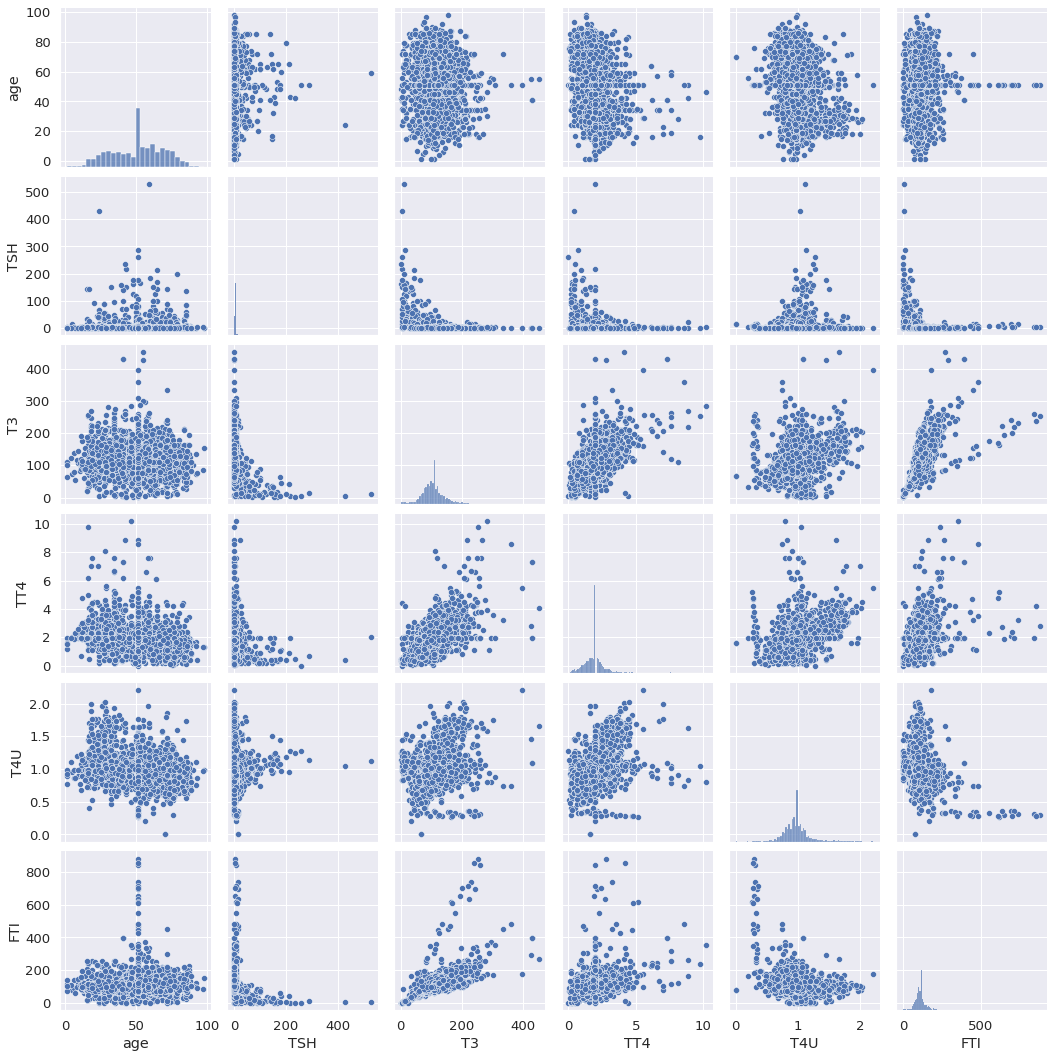

In [113]:
sns.pairplot(hypothyroid)
plt.show()
#this shows that there is relationship between some numericals.

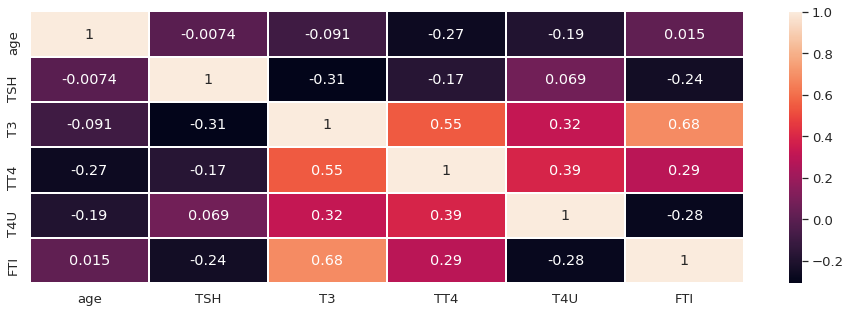

In [114]:
plt.figure(figsize = (16,5))
sns.heatmap(hypothyroid.corr(), annot=True, linewidths=1)
plt.show()
#The white colour shows strong relatonshipbut as it gets darker the relationship becomes week.
#it clearly show how some numericals have week relationship and others dont have.

B) Categorical

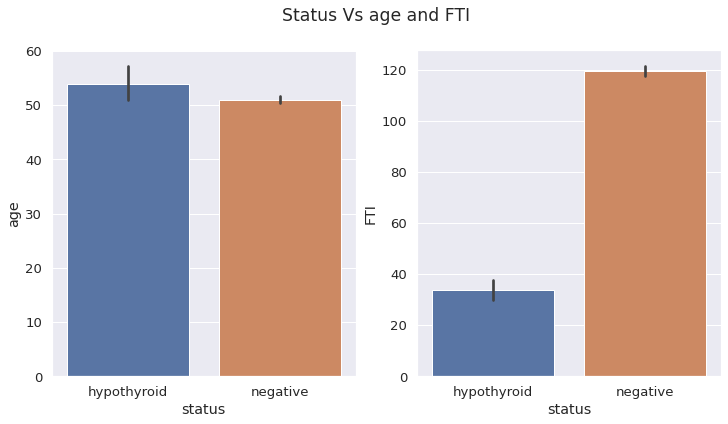

In [115]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Status Vs age and FTI')
sns.barplot(hypothyroid['status'], y= hypothyroid['age'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['FTI'], ax=ax2)
plt.show()
#Those with low FTI have hypothyroid but those with high FTI do not have hypothyroid.

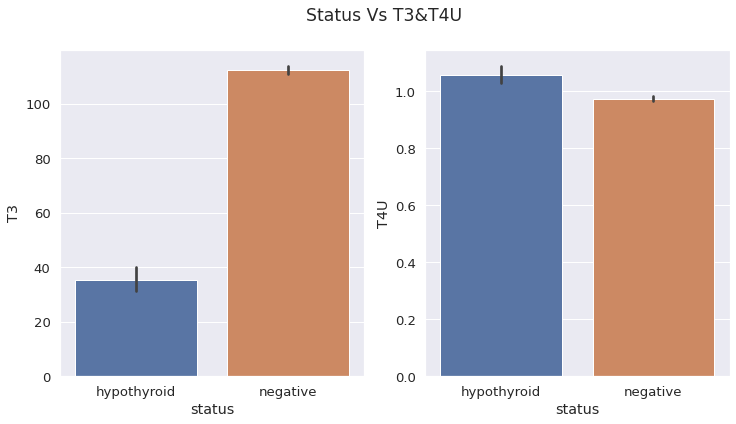

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Status Vs T3&T4U')
sns.barplot(hypothyroid['status'], y= hypothyroid['T3'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['T4U'], ax=ax2)
plt.show()
#patients with high T3 have negative hypothyroid, while the ones with low T3 have hypothyroid.
# T4U is almost the same on status of hypothyroid.

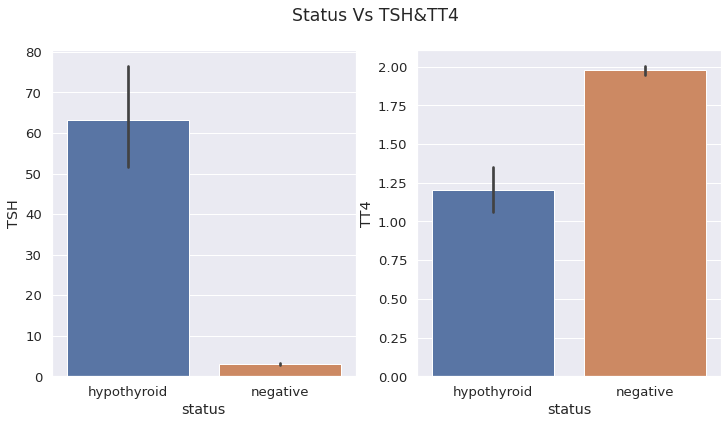

In [117]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Status Vs TSH&TT4')
sns.barplot(hypothyroid['status'], y= hypothyroid['TSH'], ax=ax1)
sns.barplot(hypothyroid['status'], y= hypothyroid['TT4'], ax=ax2)
plt.show()
# patients with hypothyroid have high TSH and low TT4

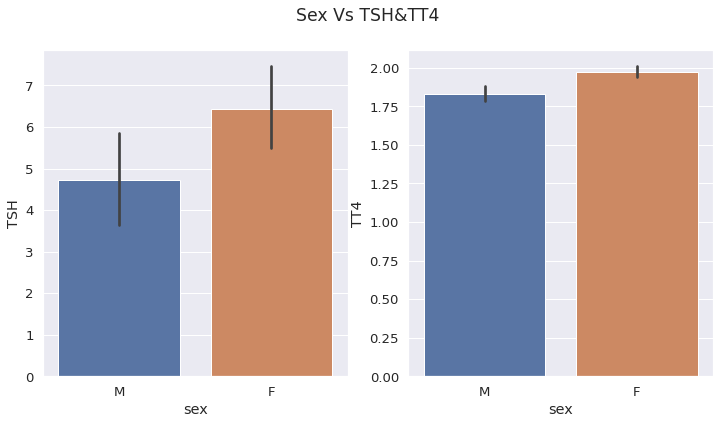

In [118]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Sex Vs TSH&TT4')
sns.barplot(hypothyroid['sex'], y= hypothyroid['TSH'], ax=ax1)
sns.barplot(hypothyroid['sex'], y= hypothyroid['TT4'], ax=ax2)
plt.show()
#more females had TSH and TT4 compared to males

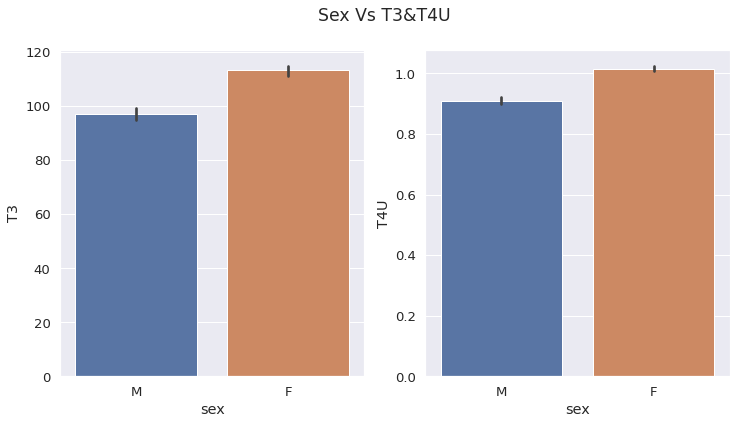

In [119]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Sex Vs T3&T4U')
sns.barplot(hypothyroid['sex'], y= hypothyroid['T3'], ax=ax1)
sns.barplot(hypothyroid['sex'], y= hypothyroid['T4U'], ax=ax2)
plt.show()
#more females had T3 and T4U

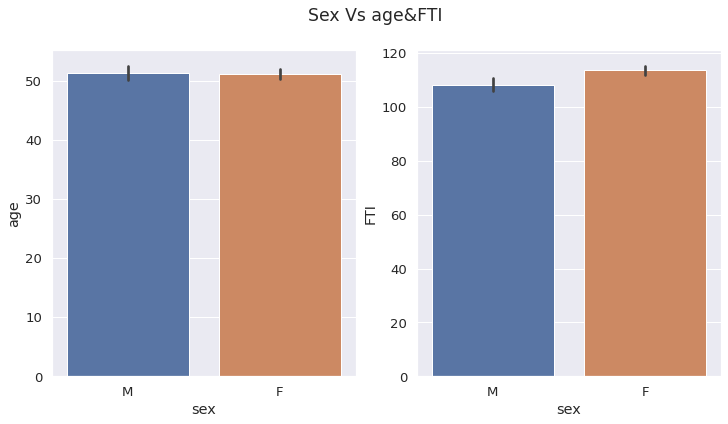

In [120]:
fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(12, 6))
fig.suptitle('Sex Vs age&FTI')
sns.barplot(hypothyroid['sex'], y= hypothyroid['age'], ax=ax1)
sns.barplot(hypothyroid['sex'], y= hypothyroid['FTI'], ax=ax2)
plt.show()
#Bothe male and females had same avarage age but slightly more females tasted positive for FTI 

### 3. Multivariate Analysis

In [215]:
hypothyroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n


In [216]:
hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
dtype: object

In [217]:
hypothyroid.shape

(3090, 25)

LABEL ENCODING

In [218]:
#data for label encoding

hypothyroid_encode =hypothyroid.copy(deep=True)

hypothyroid_encode['sex']=hypothyroid_encode['sex'].astype('category')
hypothyroid_encode['on_thyroxine']=hypothyroid_encode['on_thyroxine'].astype('category')
hypothyroid_encode['query_on_thyroxine']=hypothyroid_encode['query_on_thyroxine'].astype('category')
hypothyroid_encode['on_antithyroid_medication']=hypothyroid_encode['on_antithyroid_medication'].astype('category')
hypothyroid_encode['thyroid_surgery']=hypothyroid_encode['thyroid_surgery'].astype('category')
hypothyroid_encode['query_hypothyroid']=hypothyroid_encode['query_hypothyroid'].astype('category')
hypothyroid_encode['query_hyperthyroid']=hypothyroid_encode['query_hyperthyroid'].astype('category')
hypothyroid_encode['pregnant']=hypothyroid_encode['pregnant'].astype('category')
hypothyroid_encode['sick']=hypothyroid_encode['sick'].astype('category')
hypothyroid_encode['tumor']=hypothyroid_encode['tumor'].astype('category')
hypothyroid_encode['lithium']=hypothyroid_encode['lithium'].astype('category')
hypothyroid_encode['goitre']=hypothyroid_encode['goitre'].astype('category')
hypothyroid_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3090 non-null   object  
 1   age                        3090 non-null   int64   
 2   sex                        3090 non-null   category
 3   on_thyroxine               3090 non-null   category
 4   query_on_thyroxine         3090 non-null   category
 5   on_antithyroid_medication  3090 non-null   category
 6   thyroid_surgery            3090 non-null   category
 7   query_hypothyroid          3090 non-null   category
 8   query_hyperthyroid         3090 non-null   category
 9   pregnant                   3090 non-null   category
 10  sick                       3090 non-null   category
 11  tumor                      3090 non-null   category
 12  lithium                    3090 non-null   category
 13  goitre                     3090 n

In [219]:
hypothyroid_encode.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n


In [226]:
#label encoding the categorical data
from sklearn.preprocessing import LabelEncoder

LabelEncoder =LabelEncoder()


hypothyroid_encode['sex']=LabelEncoder.fit_transform(hypothyroid_encode['sex'])
hypothyroid_encode['on_thyroxine']=LabelEncoder.fit_transform(hypothyroid_encode['on_thyroxine'])
hypothyroid_encode['query_on_thyroxine']=LabelEncoder.fit_transform(hypothyroid_encode['query_on_thyroxine'])
hypothyroid_encode['on_antithyroid_medication']=LabelEncoder.fit_transform(hypothyroid_encode['on_antithyroid_medication'])
hypothyroid_encode['thyroid_surgery']=LabelEncoder.fit_transform(hypothyroid_encode['thyroid_surgery'])
hypothyroid_encode['query_hypothyroid']=LabelEncoder.fit_transform(hypothyroid_encode['query_hypothyroid'])
hypothyroid_encode['query_hyperthyroid']=LabelEncoder.fit_transform(hypothyroid_encode['query_hyperthyroid'])
hypothyroid_encode['pregnant']=LabelEncoder.fit_transform(hypothyroid_encode['pregnant'])
hypothyroid_encode['sick']=LabelEncoder.fit_transform(hypothyroid_encode['sick'])
hypothyroid_encode['tumor']=LabelEncoder.fit_transform(hypothyroid_encode['tumor'])
hypothyroid_encode['lithium']=LabelEncoder.fit_transform(hypothyroid_encode['lithium'])
hypothyroid_encode['goitre']=LabelEncoder.fit_transform(hypothyroid_encode['goitre'])
hypothyroid_encode.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72,1,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,1,15,0,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n
2,1,24,1,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,4.0,y,0.2,y,1.00,y,0.0,n
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,6.0,y,0.4,y,1.04,y,6.0,n
4,1,77,1,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,57.0,y,1.2,y,1.28,y,44.0,n


In [227]:
hypothyroid_encode['status'].unique()

array(['1', '0'], dtype=object)

In [228]:
hypothyroid_encode.loc[hypothyroid_encode['status']=='hypothyroid', 'status']='1'
hypothyroid_encode.loc[hypothyroid_encode['status']=='negative', 'status']='0'
hypothyroid_encode['status'].unique()

array(['1', '0'], dtype=object)

In [229]:
hypothyroid_encode['sex'].unique()

array([1, 0])

In [230]:
#separating target label; 'status' from other features
feature = hypothyroid_encode.drop(['status', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], 1)
label = hypothyroid_encode['status']

feature.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,72,1,0,0,0,0,0,0,0,0,0,0,0,30.0,15.0,0.6,1.48,10.0
1,15,0,1,0,0,0,0,0,0,0,0,0,0,145.0,19.0,1.7,1.13,17.0
2,24,1,0,0,0,0,0,0,0,0,0,0,0,0.0,4.0,0.2,1.00,0.0
3,24,0,0,0,0,0,0,0,0,0,0,0,0,430.0,6.0,0.4,1.04,6.0
4,77,1,0,0,0,0,0,0,0,0,0,0,0,7.3,57.0,1.2,1.28,44.0


In [231]:
hypothyroid_encode.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72,1,0,0,0,0,0,0,0,0,0,0,0,y,30.0,y,15.0,y,0.6,y,1.48,y,10.0,n
1,1,15,0,1,0,0,0,0,0,0,0,0,0,0,y,145.0,y,19.0,y,1.7,y,1.13,y,17.0,n
2,1,24,1,0,0,0,0,0,0,0,0,0,0,0,y,0.0,y,4.0,y,0.2,y,1.00,y,0.0,n
3,1,24,0,0,0,0,0,0,0,0,0,0,0,0,y,430.0,y,6.0,y,0.4,y,1.04,y,6.0,n
4,1,77,1,0,0,0,0,0,0,0,0,0,0,0,y,7.3,y,57.0,y,1.2,y,1.28,y,44.0,n


## 7. Modelling

### Part 1: Decision trees:

In [241]:
hypothyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [259]:
# Split the independent and dependent variables
# We want to predict if someone has hypothyroid or not
y = hypothyroid_encode['status'].values

#X = hypothyroid_encode[['age',	'TSH', 'T3',	'TT4',	'T4U', 'FTI']].values

test_features = hypothyroid_encode[['age',	'TSH', 'T3',	'TT4',	'T4U', 'FTI']].columns.to_list()

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = hypothyroid_encode[test_features].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Random Forest**

In [260]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
613,0,0
614,0,0
615,0,0
616,0,0


In [261]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       586
           1       0.97      0.91      0.94        32

    accuracy                           0.99       618
   macro avg       0.98      0.95      0.97       618
weighted avg       0.99      0.99      0.99       618

[[585   1]
 [  3  29]]


From the F1-score and accuracy score we can see that we have 100% & 99% which shows a perfect model that will probably be a case of overfiting.

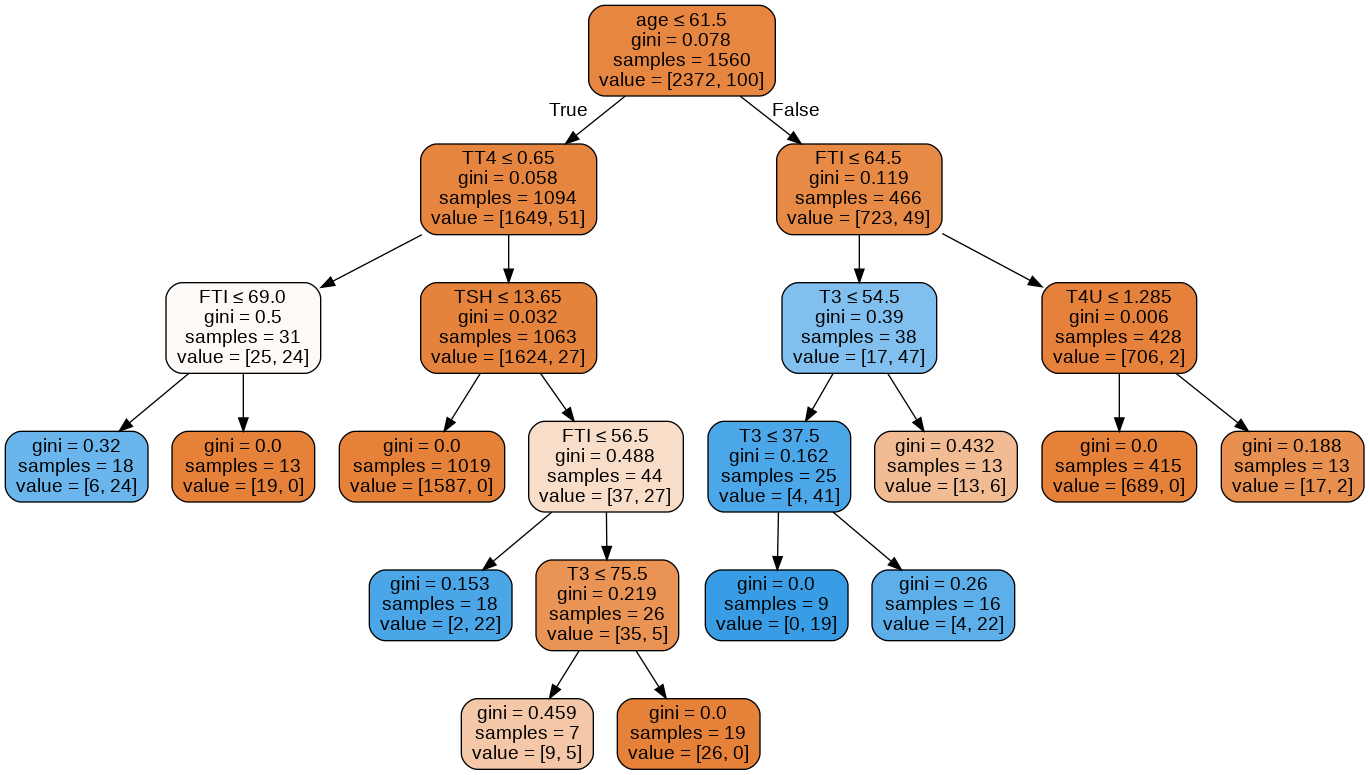

In [262]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

it shows that 1560 samples were tested

In [263]:
# Get numerical feature importances
importances = list(gbr.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('TSH', 0.27), ('T3', 0.03), ('TT4', 0.01), ('T4U', 0.0), ('FTI', 0.67)]

Variable: FTI                  Importance: 0.67
Variable: TSH                  Importance: 0.27
Variable: T3                   Importance: 0.03
Variable: age                  Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.0


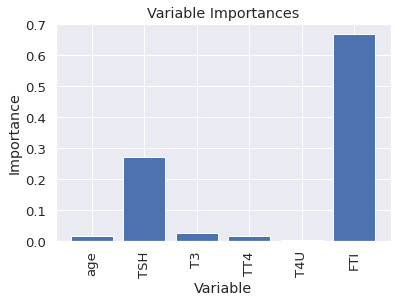

In [264]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


#### **Adaboost clasifier**

In [273]:
#adaboost training and prediction
#max_depth is 1

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=50, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ada = ada_boost.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
613,0,0
614,0,0
615,0,0
616,0,0


In [274]:
print(metrics.classification_report(y_test, y_pred_ada))
print(metrics.confusion_matrix(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       586
           1       1.00      0.84      0.92        32

    accuracy                           0.99       618
   macro avg       1.00      0.92      0.96       618
weighted avg       0.99      0.99      0.99       618

[[586   0]
 [  5  27]]


when we increase the random state the training score increases and the test score reduces. so its best to have the lowest value for random sate.

#### **Gradient boost**

In [315]:
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


In [316]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_gbr))
print(metrics.confusion_matrix(y_test, y_pred_gbr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       586
           1       0.97      0.88      0.92        32

    accuracy                           0.99       618
   macro avg       0.98      0.94      0.96       618
weighted avg       0.99      0.99      0.99       618

[[585   1]
 [  4  28]]


when we reduce the learning rate the training score percantage reduce and vice versa. the same apliies to max_depth.

#### Optimized GBR using hyperparameters

In [287]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}


In [290]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [295]:
#Best Hyperparameters Value
print('n_estimators:', cv.best_estimator_.get_params()['n_estimators'])
print('max_depth:', cv.best_estimator_.get_params()['max_depth'])
print('learning_rate:', cv.best_estimator_.get_params()['learning_rate'])
#Predict testing set
y_pred = cv.predict(X_test)
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))
#Check performance using ROC

n_estimators: 250
max_depth: 3
learning_rate: 0.01
0.9935275080906149


#### **Gradient boost- Optimized**

In [311]:
gbr = GradientBoostingClassifier(n_estimators=250, learning_rate=0.01, max_depth=3)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr_op = gbr.predict(X_test)

In [312]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_gbr_op))
print(metrics.confusion_matrix(y_test, y_pred_gbr_op))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       586
           1       0.97      0.91      0.94        32

    accuracy                           0.99       618
   macro avg       0.98      0.95      0.97       618
weighted avg       0.99      0.99      0.99       618

[[585   1]
 [  3  29]]


F1 score has increased from 91% to 94%.

In [317]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred_ada))
print(metrics.confusion_matrix(y_test, y_pred_gbr))
print(metrics.confusion_matrix(y_test, y_pred_gbr_op))

[[585   1]
 [  3  29]]
[[586   0]
 [  5  27]]
[[585   1]
 [  4  28]]
[[585   1]
 [  3  29]]


The false negative score reduced after the GBR was optimized

False negatives are higher than false positive

### Part 2: SVM:

In [232]:
y =  hypothyroid_encode['status'].values

X= hypothyroid_encode[['FTI', 'TSH']].values


#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

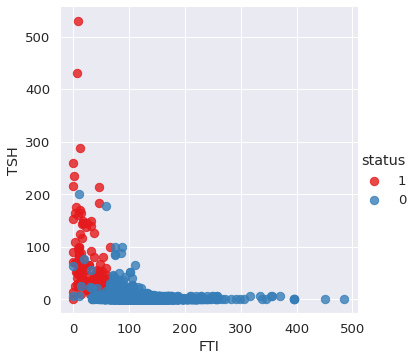

In [320]:
# Plotting our desired features
sns.lmplot('FTI','TSH', data=hypothyroid_encode, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

Those who have hyperthyroid have low FTI and those who dont have hyperthyroid have low TSH

#### A. Polynomial

In [321]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3, gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [322]:
X.shape

(3090, 2)

In [323]:
# making prediction
y_pred_poly = polyclassifier.predict(X_test)
#y_pred_poly2 = polyclassifier.predict(X_train)


In [326]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_poly))
print(metrics.confusion_matrix(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.79      0.73      0.76        26

    accuracy                           0.98       618
   macro avg       0.89      0.86      0.87       618
weighted avg       0.98      0.98      0.98       618

[[587   5]
 [  7  19]]


When the degree is increased the accuracy drops.

#### B) Radial basis function (rbf)

In [335]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', degree=3, gamma= 'scale')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [328]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)


In [329]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_rbf))
print(metrics.confusion_matrix(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]


#### C) Linear Model

In [233]:
from sklearn.svm import SVC
# Let's now build the svm model 
thyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
thyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_linear = thyroid_model.predict(X_test)


In [331]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_linear))
print(metrics.confusion_matrix(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]


WE got 98% accuracy wchich is good.

#### SVM-RBF optimization

In [342]:
gamma_range =[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
  svc= SVC(kernel='rbf', gamma=g)
  scores= cross_val_score(svc,X_train, y_train, cv=10, scoring='accuracy')
  acc_score.append(scores.mean())
  print(acc_score)

[0.9821992947629621]
[0.9821992947629621, 0.9830106438552958]
[0.9821992947629621, 0.9830106438552958, 0.9801782682512734]
[0.9821992947629621, 0.9830106438552958, 0.9801782682512734, 0.9696617474206608]


best accuracy is at gamma of 0.001

In [246]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', degree=3, gamma= 0.001)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_rbf_op = rbfclassifier.predict(X_test)

In [247]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_rbf_op))
print(metrics.confusion_matrix(y_test, y_pred_rbf_op))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]


#### SVM-linear optimization

In [374]:
C_range =list(range(1,10))
acc_score=[]
for c in C_range:
  svc= SVC(kernel='linear', C=c)
  scores= cross_val_score(svc,X_train, y_train, cv=10, scoring='accuracy')
  acc_score.append(scores.mean())
  print(acc_score)

[0.9769426668407993]
[0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993]
[0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9769426668407993, 0.9773475251403945]


In [248]:
# Let's now build the svm optimized model 
thyroid_model = SVC(kernel = 'linear', C= 1)
# Train the model using the training set
thyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_linear_op = thyroid_model.predict(X_test)

In [249]:
#getting the scores
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred_linear_op))
print(metrics.confusion_matrix(y_test, y_pred_linear_op))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]


#### SVM-polynomial optimization

In [239]:
C_range =list(range(1,10))
acc_score=[]
for c in C_range:
  svc= SVC(kernel='poly', C=c)
  scores= cross_val_score(svc,X_train, y_train, cv=10, scoring='accuracy')
  acc_score.append(scores.mean())
  print(acc_score)

[0.9785637325323234]
[0.9785637325323234, 0.978565365025467]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9781588742327283]
[0.9785637325323234, 0.978565365025467, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9785637325323234, 0.9781588742327283, 0.9781588742327283]


best C value is 2 with the highest accuracy.

In [250]:
# Building the model 
polyclassifier = SVC(kernel='poly',C=2, gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred_poly_op = polyclassifier.predict(X_test)

In [251]:
#getting the scores
print(metrics.classification_report(y_test, y_pred_poly_op))
print(metrics.confusion_matrix(y_test, y_pred_poly_op))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.86      0.73      0.79        26

    accuracy                           0.98       618
   macro avg       0.93      0.86      0.89       618
weighted avg       0.98      0.98      0.98       618

[[589   3]
 [  7  19]]


The true negative has increased and false negative has reduced after optiization.

In [252]:
print(metrics.classification_report(y_test, y_pred_rbf_op))
print(metrics.confusion_matrix(y_test, y_pred_rbf_op))

print(metrics.classification_report(y_test, y_pred_linear_op))
print(metrics.confusion_matrix(y_test, y_pred_linear_op))

print(metrics.classification_report(y_test, y_pred_poly_op))
print(metrics.confusion_matrix(y_test, y_pred_poly_op))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.86      0.73      0.79        26

    accuracy                           0.98       618
   macro avg       0.93      0.86      0.89       618
weighted avg       0.98     

Both Linear and RBF model are the best.

#### Adding more features to the best selected model(Optimized linear model)

In [253]:
X= hypothyroid_encode[['age',	'TSH', 'T3',	'TT4',	'T4U', 'FTI']].values
y=hypothyroid_encode['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [254]:
# Let's now build the svm model 
thyroid_model = SVC(kernel = 'linear', C=1, degree= 3)
# Train the model using the training set
thyroid_model.fit(X_train,y_train)



SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [255]:
# Predict the response for the test set
y_pred_linear2 = thyroid_model.predict(X_test)

In [256]:
print(metrics.classification_report(y_test, y_pred_linear2))
print(metrics.confusion_matrix(y_test, y_pred_linear2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       1.00      0.69      0.82        26

    accuracy                           0.99       618
   macro avg       0.99      0.85      0.91       618
weighted avg       0.99      0.99      0.99       618

[[592   0]
 [  8  18]]


WE get the same accuracy when more features are added.

## 9. Challenge the solution

 Reviewing the Solution 

There were alot of outliers which might affect the model, if we were provided with other dataset or metadata we would know more about the outliers and how to act on them and produce better perfoming models.

## 10. Follow up question

### a). Did we have the right data?


Yes

### b). Do we need other data to answer our question?


Yes, we need more data and metadata. 

### c). Did we have the right question?

Yes